In [3]:
import random, pylab

class FairRoulette():
    
    def __init__(self):
        self.pockets = []
        
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.blackOdds, self.redOdds = 1.0, 1.0  #We win a dollar if our colour comes up. Equal chance of either colour coming up since it is fair
        self.pocketOdds = len(self.pockets) - 1.0
        
    def spin(self):
        self.ball = random.choice(self.pockets)
        
    def isBlack(self):
        
        if type(self.ball) != int:  # Just error checking
            return False
        if ((self.ball > 0 and self.ball <=10) or (self.ball>18 and self.ball<=28)):
            return self.ball%2 == 0
        
        else:
            return self.ball%2 == 1
        
    def isRed(self):
        return type(self.ball) == int and not self.isBlack()
    
    def betBlack(self, amt):
        if self.isBlack():
            return amt*self.blackOdds
        else:
            return -amt
        
    def betRed(self, amt):
        if self.isRed():
            return amt*self.redOdds
        else:
            return -amt*self.redOdds
        
    def betPocket(self,pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else:
            return -amt
        
    def __str__(self):
        return 'Fair Roulette'
    
def playRoulette(game, numSpins, toPrint = True):
    luckyNumber = '2'
    bet = 1
    totRed, totBlack, totPocket = 0.0, 0.0, 0.0
    
    for i in range(numSpins):
        game.spin()
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(luckyNumber, bet)
    
    if toPrint:
        print(numSpins, 'spins of', game)
        
        print('Expected return betting red =', str(100*totRed/numSpins)+'%')
        print('Expected return betting black =', str(100*totBlack/numSpins) + '%')
        print('Expected return betting', luckyNumber, '=',str(100*totPocket/numSpins) + '%\n')
        
    return (totRed/numSpins, totBlack/numSpins, totPocket/numSpins)

numSpins = 1000000
game = FairRoulette()
playRoulette(game, numSpins)

1000000 spins of Fair Roulette
Expected return betting red = -0.133%
Expected return betting black = 0.133%
Expected return betting 2 = -0.3268%



(-0.00133, 0.00133, -0.003268)

In [4]:
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return "European Roulette"
    
class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append("00")
    def __str__(self):
        return "American Roulette"
    
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, toPrint)
        pocketReturns.append(trialVals[2])
        
    return pocketReturns

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] =[]
    
for numSpins in (100, 1000, 10000, 100000):
    print('\nSimulate betting a pocket for', numTrials, 'trials of', numSpins, 'spins each.')
    
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials, numSpins, False)
        print('Expected return for', G(), '=', str(100*sum(pocketReturns)/float(len(pocketReturns))) + '%')

        


Simulate betting a pocket for 20 trials of 100 spins each.
Expected return for Fair Roulette = 6.199999999999998%
Expected return for European Roulette = -8.200000000000001%
Expected return for American Roulette = 2.599999999999998%

Simulate betting a pocket for 20 trials of 1000 spins each.
Expected return for Fair Roulette = 4.760000000000002%
Expected return for European Roulette = -2.4399999999999995%
Expected return for American Roulette = -9.46%

Simulate betting a pocket for 20 trials of 10000 spins each.
Expected return for Fair Roulette = -1.3060000000000003%
Expected return for European Roulette = -4.095999999999999%
Expected return for American Roulette = -5.698000000000001%

Simulate betting a pocket for 20 trials of 100000 spins each.
Expected return for Fair Roulette = 0.7982%
Expected return for European Roulette = -2.5876000000000006%
Expected return for American Roulette = -5.134600000000001%


In [5]:
def getMeanAndStd(X):
    mean = sum(X) / float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean) ** 2
    std = (tot/len(X))**0.5
    return mean, std

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] =[]
    
for numSpins in (100, 1000, 10000, 100000):
    print('\nSimulate betting a pocket for', numTrials, 'trials of', numSpins, 'spins each.')
    
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials, numSpins, False)
        mean, std = getMeanAndStd(pocketReturns)
        resultDict[G().__str__()].append((numSpins, 100*mean, 100*std))
        print('Expected return for', G(), '=', str(round(100*mean, 3))+ '% ', '+/- ' + str(round(100*1.96 * std, 3)) + '% with 95% confidence')

        print('Exp')


Simulate betting a pocket for 20 trials of 100 spins each.
Expected return for Fair Roulette = 6.2%  +/- 152.114% with 95% confidence
Exp
Expected return for European Roulette = -8.2%  +/- 90.567% with 95% confidence
Exp
Expected return for American Roulette = 2.6%  +/- 92.74% with 95% confidence
Exp

Simulate betting a pocket for 20 trials of 1000 spins each.
Expected return for Fair Roulette = 4.76%  +/- 39.658% with 95% confidence
Exp
Expected return for European Roulette = -2.44%  +/- 31.31% with 95% confidence
Exp
Expected return for American Roulette = -9.46%  +/- 36.273% with 95% confidence
Exp

Simulate betting a pocket for 20 trials of 10000 spins each.
Expected return for Fair Roulette = -1.306%  +/- 9.295% with 95% confidence
Exp
Expected return for European Roulette = -4.096%  +/- 10.902% with 95% confidence
Exp
Expected return for American Roulette = -5.698%  +/- 11.077% with 95% confidence
Exp

Simulate betting a pocket for 20 trials of 100000 spins each.
Expected return

Write a function, stdDevOfLengths(L) that takes in a list of strings, L, and outputs the standard deviation of the lengths of the strings. Return float('NaN') if L is empty.

In [6]:
def stdDevOfLengths(L):
    """
    L: a list of strings

    returns: float, the standard deviation of the lengths of the strings,
      or NaN if L is empty.
    """
    if L == []:
        return float('NaN')
    
    lenL = []
    
    for string in L:
        lenL.append(len(string))
    
    tot = 0
    stdDev = 0
    mean = sum(lenL)/ float(len(lenL))
    
    for x in lenL:
        tot += (x - mean)**2
        
    stdDev = (float(tot) / len(lenL)) ** 0.5
    
    return stdDev
    

In [7]:
m , sd = getMeanAndStd( [10, 4, 12, 15, 20, 5])

In [8]:
sd/ m

0.5034317492677621

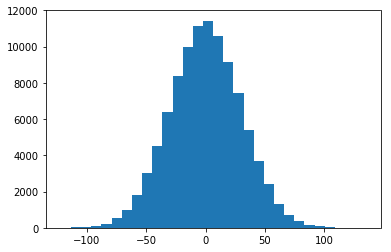

In [9]:
import random, pylab
dist = []
x = []
for i in range(100000):
    x.append(i)
    dist.append(random.gauss(0,30))
    
# pylab.hist(dist, 30)
pylab.hist(dist, 30)
pylab.show()

In [10]:
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = (1.0/ (sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e** -(((x-mu)**2)/(2*sigma**2))
    return factor1 * factor2

def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print("mu = ", mu, "and sigma = ", sigma )
        for numStd in (1, 1.96, 3):
            area = scipy.integrate.quad(gaussian, mu-numStd * sigma, mu+numStd*sigma, (mu, sigma) )[0]
            print(' Fraction within', numStd, 'std = ', area*100)
            
checkEmpirical(3)

mu =  -2 and sigma =  8
 Fraction within 1 std =  68.2689492137086
 Fraction within 1.96 std =  95.00042097035592
 Fraction within 3 std =  99.730020393674
mu =  7 and sigma =  7
 Fraction within 1 std =  68.26894921370861
 Fraction within 1.96 std =  95.00042097035593
 Fraction within 3 std =  99.730020393674
mu =  -4 and sigma =  10
 Fraction within 1 std =  68.26894921370861
 Fraction within 1.96 std =  95.00042097035592
 Fraction within 3 std =  99.73002039367402


Mean of rolling 1 die =  2.5009636448931714, Std = 1.444440660772378
Mean of rolling 50 dice =  2.501061161821491, Std = 0.1996178322316606


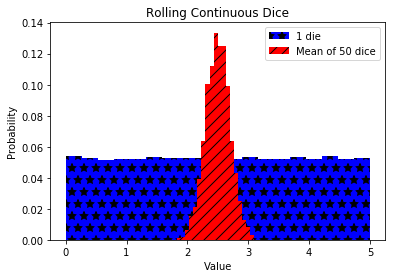

In [11]:
# Central Limit theorem
import random, pylab
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random()
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend, weights = pylab.array(len(means)*[1])/len(means), hatch = style)
    return getMeanAndStd(means)

mean, std = plotMeans(1, 100000, 19, '1 die', 'b','*')
print('Mean of rolling 1 die = ', str(mean) + ',', 'Std =',std)

mean, std = plotMeans(50, 100000, 19, 'Mean of 50 dice', 'r','//')
print('Mean of rolling 50 dice = ', str(mean) + ',', 'Std =',std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()


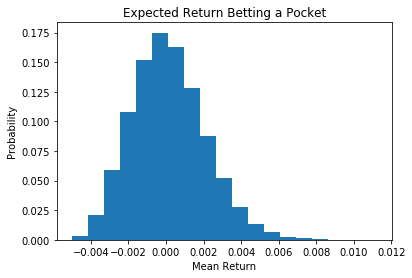

In [15]:
numTrials = 50000
numSpins = 200
game = FairRoulette()

means = []
for i in range(numTrials):
    means.append(findPocketReturn(game, 1, numSpins, False)[0] / numSpins)
    
pylab.hist(means, bins = 19, weights = pylab.array(len(means)*[1])/ len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')
pylab.title('Expected Return Betting a Pocket')
pylab.show()

In [18]:
# Simulating Buffon Laplace method

def throwNeedles(numNeedles):
    
    inCircle = 0
    for needles in range(1, numNeedles+1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y) ** 0.5 <= 1.0:
            inCircle += 1
    return 4 * (inCircle/ float(numNeedles))

def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = getMeanAndStd(estimates)[1]
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) + ', StdDev = ' +str(round(sDev, 6)) + ', Needles = '+str(numNeedles))
    return (curEst, sDev)

def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst,sDev = getEst(numNeedles,numTrials)
        numNeedles*= 2
    return curEst

estPi(0.005, 100)

Est. = 3.140080000000001, StdDev = 0.053907, Needles = 1000
Est. = 3.14372, StdDev = 0.036318, Needles = 2000
Est. = 3.13789, StdDev = 0.025965, Needles = 4000
Est. = 3.141149999999998, StdDev = 0.01939, Needles = 8000
Est. = 3.1419574999999993, StdDev = 0.012871, Needles = 16000
Est. = 3.140923750000001, StdDev = 0.009346, Needles = 32000
Est. = 3.1414225, StdDev = 0.007127, Needles = 64000
Est. = 3.1419396874999994, StdDev = 0.004843, Needles = 128000
Est. = 3.1417750000000013, StdDev = 0.003749, Needles = 256000
Est. = 3.141720468750001, StdDev = 0.002242, Needles = 512000


3.141720468750001

In [69]:
def noReplacementSimulation(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    3 red and 3 green balls. Balls are not replaced once
    drawn. Returns the a decimal - the fraction of times 3 
    balls of the same color were drawn.
    '''
    # Your code here
    
    trueBucket = [0, 1, 0, 1, 1, 0]
    sameColour = 0
    
    for trials in range(numTrials):
        chosen = []
        bucket = trueBucket[:]
        # 1 for red balls, 0 for green balls
        while len(chosen) < 3:
            poped = bucket.pop(random.randint(0,len(bucket)-1))
            chosen.append(poped)
#         print(chosen)
        if 0 not in chosen or 1 not in chosen:
            sameColour += 1
            
    return sameColour / numTrials

In [70]:
L = [0, 1, 0, 1, 1, 0]
l = [0, 0, 0 , 0]
0 not in L or 1 not in l

True

In [72]:
numTrials = 100
noReplacementSimulation(numTrials)

[1, 1, 0]
[0, 1, 0]
[1, 0, 0]
[1, 1, 1]
[1, 1, 0]
[0, 0, 1]
[0, 0, 1]
[0, 1, 0]
[1, 0, 0]
[0, 0, 1]
[0, 0, 1]
[1, 0, 0]
[1, 0, 0]
[0, 0, 0]
[1, 0, 0]
[1, 1, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0]
[0, 1, 0]
[0, 1, 1]
[1, 0, 1]
[0, 0, 1]
[1, 1, 0]
[0, 0, 0]
[0, 0, 1]
[1, 0, 0]
[0, 1, 0]
[1, 1, 1]
[1, 0, 1]
[0, 1, 1]
[0, 1, 0]
[1, 0, 0]
[0, 0, 1]
[1, 1, 0]
[1, 1, 1]
[1, 0, 1]
[1, 1, 0]
[0, 1, 0]
[1, 1, 0]
[0, 0, 0]
[1, 0, 0]
[1, 0, 1]
[0, 1, 1]
[1, 0, 1]
[1, 0, 0]
[0, 1, 0]
[1, 0, 1]
[1, 0, 0]
[0, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 1]
[0, 0, 1]
[1, 1, 0]
[1, 0, 0]
[1, 1, 0]
[0, 1, 1]
[0, 1, 1]
[1, 1, 0]
[1, 1, 0]
[0, 1, 0]
[0, 0, 0]
[1, 0, 1]
[0, 1, 1]
[0, 0, 1]
[1, 0, 1]
[0, 1, 0]
[1, 0, 1]
[1, 0, 0]
[0, 0, 1]
[1, 0, 0]
[1, 0, 0]
[1, 1, 0]
[1, 0, 1]
[0, 0, 0]
[1, 1, 0]
[1, 0, 0]
[0, 0, 1]
[1, 0, 1]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[1, 0, 1]
[0, 0, 1]
[1, 1, 0]
[1, 0, 0]
[1, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 1, 0]
[1, 0, 0]
[1, 1, 1]
[1, 1, 1]
[0, 1, 0]
[1, 0, 1]
[0, 1, 1]


0.14